# CH02.사이킷런으로 시작하는 머신러닝

## 사이킷런 소개와 특징
파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리
* 쉽고 파이썬스러운 API
* 머신러닝을 위한 다양한 알고리즘과 개발을 위한 편리한 프레임워크, API 제공

anaconda를 설치하면 scikit-learn이 기본적으로 설치됨.<br>
별도설치 `conda install scikit-learn` 또는 `pip install scikit-learn`

In [1]:
import sklearn
print(sklearn.__version__)

0.23.2


## 첫 번째 머신러닝 만들어보기 - 붓꽃 품종 예측하기
붓꽃 데이터 세트로 붓꽃의 품종을 분류 (Classification) 

The data set consists of:
* 150 samples
* 3 labels: species of Iris (Iris setosa, Iris virginica and Iris versicolor)
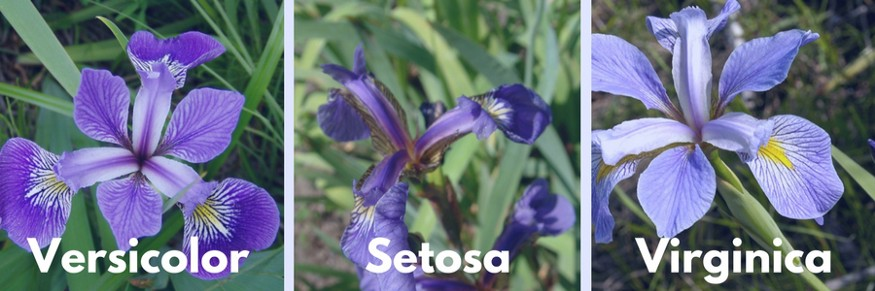
* 4 features: Sepal length,Sepal width,Petal length,Petal Width in cm<br>
(꽃잎의 길이와 너비, 꽃밭침의 길이와 너비)

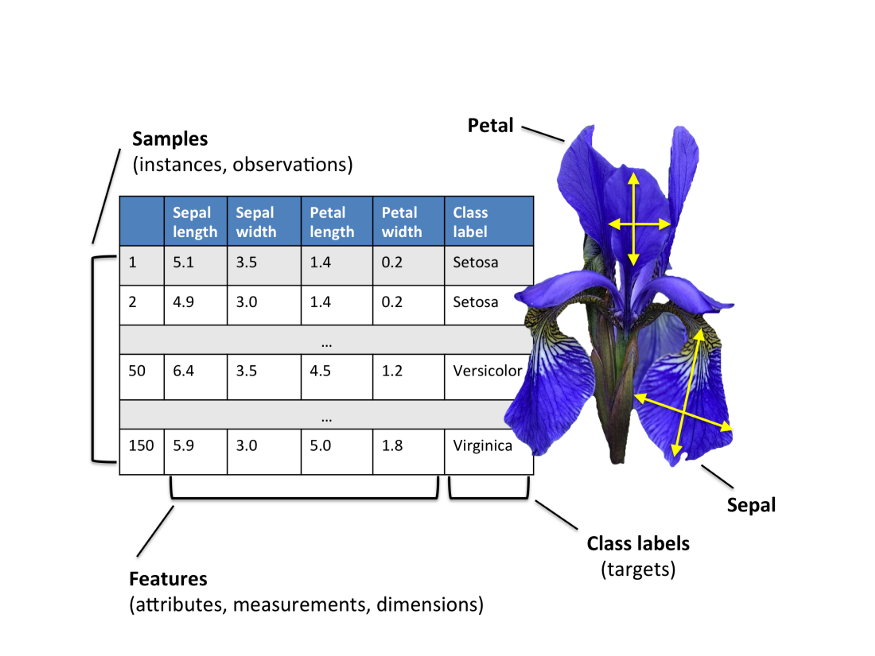

피쳐(Feature)를 기반으로 꽃의 품종(label)을 예측

분류(Classification)는 대표적인 지도학습(Supervised Learning) 방법의 하나.<br>
: 정답이 주어진 학습 데이터 세트(train dataset)를 학습한 후, test dataset에서 미지의 레이블을 예측

* `sklearn.datasets` : 자체적으로 제공하는 데이터세트를 생성하는 모듈
* `sklearn.tree` : 트리 기반 ml알고리즘을 구현한 클래스 모임

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier #의사결정트리
from sklearn.model_selection import train_test_split #데이터셋을 train 과 test set으로 분류

In [6]:
import pandas as pd

#붓꽃 데이터셋 로딩
iris = load_iris()

# iris.data : 피처(feature)만으로 된 데이터 / numpy형태 
iris_data = iris.data
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
# iris.target : 레이블(결정 값) 데이터 / numpy형태
iris_label = iris.target
print('iris target값 :', iris_label)
print('iris target명 :', iris.target_names)

iris target값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명 : ['setosa' 'versicolor' 'virginica']


품종 0이 `setosa`, 1이 `versicolor`, 2가 `virginica`

In [10]:
# 붓꽃 데이터 세트를 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target #'label' 열 추가
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
#데이터셋 분리 - train_test_split() 함수 사용
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

* train dataset과 test dataset을 8:2로 분리
* `random_state`는 호출시마다 같은 dataset으로 분리하기 위해 지정하는 난수 발생값<br>(지정하지 않을 시 호출할 때마다 다른 train/test dataset을 생성)
* 학습용 dataset을 `X_train`으로, 테스트용 dataset을 `X_test`로, 학습용 레이블 dataset을 `y_train`, 테스트용 레이블 dataset을 `y_test`로 반환

In [14]:
#DesicionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

In [16]:
#생성된 객체의 fit()메서드를 통해 학습 수행
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [18]:
#학습이 완료된 객체에서 predict() 매서드를 통해 예측 수행
pred = dt_clf.predict(X_test)

학습된 모델에 기반하여 test dataset에 대한 예측값 반환

In [20]:
#정확도로 모델 평가하기 - 사이킷런의 accuracy_score() 함수 사용
from sklearn.metrics import accuracy_score

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


예측 정확도가 약 0.9333(93.33%)

* 프로세스 정리
1. 데이터 세트 분리
2. 모델 학습
3. 예측 수행
4. 성능 평가

## 사이킷런 기반의 프레임워크 익히기

### Estimator 이해 및 fit(), predict() 메서드


지도학습 - 1. 분류(Classification) , 2. 회귀(Regression)
* 사이킷런은 다양한 Classifier와 Regressor 클래스를 제공 -> 이들을 Estimator클래스 라고 부름.(지도학습의 모든 알고리즘을 구현한 클래스를 통칭)
* ML 모델 학습을 위해서 `fit()`, 학습된 모델의 예측을 위해 `predict()` 메서드를 제공.
* evaluation 함수 (Ex. cross_val_score)나 하이퍼 파라미터 튜닝을 지원하는 클래스(Ex.GridSearchCV)의 경우, Estimator를 인자로 받아서 내부에서 fit과 predict 호출 

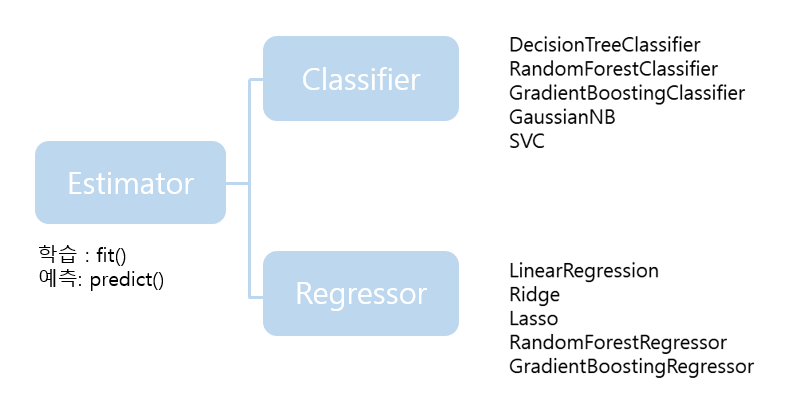

비지도학습 - 차원축소, 클러스터링, 피처 추출(Feature Extraction) 등...
* `fit()`과 `transform()` 매서드 적용, 이를 결합한 `fit_transform()`도 제공
* `fit()` : 학습을 의미X, 입력 데이터의 형태에 맞춰 데이터를 변환하기 위해 사전 구조를 맞추는 작업
* `transform()` : 실제 작업 수행

### 사이킷런의 주요 모듈

| 분류                           | 모듈명                     | 설명                                                                                                                                                                                                                                                                                         |   |   |
|--------------------------------|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|
| 예제 데이터                    | sklearn.dataset            | 사이킷런에 내장되어 예제로 제공하는 데이터 세트                                                                                                                                                                                                                                              |   |   |
| 피처처리                       | Sklearn.preprocessing      | 데이터 전처리에 필요한 다양한 가공 기능 제공(문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링 등)                                                                                                                                                                                        |   |   |
|                                | Sklearn.feature_selection  | 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렉션 작업을 수행하는 다양한 기능 제공                                                                                                                                                                                                      |   |   |
|                                | Sklearn.frature.extraction | 텍스트 데이터나 이미지 데이터의벡터화된 피처를 추출하는 데 사용. 예를 들어 텍스트 데이터에서 count vectorizer 나 tf-idf vectorizer 제공 텍스트 데이터의 피처추출은 sklearn.feature_extraction.text 모듈에, 이미지 데이터의 피처 추출은 sklearn.feature_extraction.image 모듈에 지원 api 존재 |   |   |
| 피처처리&차원 축소             | Sklearn.decomposition      | 차원 축소와 관련된 알고리즘을 지원하는 모듈, PCA,NMF(음수미포함 행렬분해), Truncated SVD 등을 통해 차원 축소 기능을 수행할 수 있음                                                                                                                                                           |   |   |
| 데이터분리,검증& 파라미터 튜닝 | Sklearn.model_selection    | 교차 검증을 위한 학습용/테스트용 분리, 그리도 서치로 최적 파라미터 추출 등의 API 제공                                                                                                                                                                                                        |   |   |
| 평가                           | Sklearn.metrics            | 분류, 회귀, 클러스터링, 페어와이즈(pairwise) 에 대한                                                                                                                                                                                                                                         |   |   |
| ML 알고리즘                    | Sklearn.ensemble           | 앙상블 알고리즘 제공 렌덤포레스트, 에이다 부스트, 그래                                                                                                                                                                                                                                       |   |   |
|                                | Sklearn.linear_model       | 주로 선형 회귀, 릿지(ridge), 라쏘(lasso), 및 로지스틱스 회귀 등 회귀 관련 알고리즘을 지원 또한 SGD(stochastic gradient descent) 알고리즘 지원                                                                                                                                                |   |   |
|                                | Sklearn.naive_bayes        | 나이브 베이즈 알고리즘 제공 가우시안NB, 다항분포NB                                                                                                                                                                                                                                           |   |   |
|                                | Sklearn.neighbors          | 최근접 이웃 알고리즘 제공, KNN 등                                                                                                                                                                                                                                                            |   |   |
|                                | Sklearn.svm                | 서브 벡터 머신 알고리즘 제공                                                                                                                                                                                                                                                                 |   |   |
|                                | Skleran.tree               | 의사 결정 트리 알고리즘 제공                                                                                                                                                                                                                                                                 |   |   |
|                                | Sklearn.cluster            | 비지도 클러스터링 알고리즘 제공 (K-means, 계층형, DBSCAN 등)                                                                                                                                                                                                                                 |   |   |
| 유틸리티                       | Sklearn.pipeline           | 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공                                                                                                                                                                                                   |   |   |

일반적으로 머신러닝 모델을 구축하는 주요 프로세스는 <br>
`피처처리` (피처의 가공, 변경, 추출을 수행) -> `ML 알고리즘 학습/예측 수행` -> `모델평가`의 단계를 반복적으로 수행하는 것! 

사이킷런 패키지는 머신러닝 모델을 구축하는 주요 프로세스를 지원하기 위한 다양한 모듈을 지원하여 많은 개발자들이 ML개발 프레임워크로 선택함.

### 내장된 예제 데이터셋

분류나 회귀 연습용 예제 데이터

| API명                          | 설명                                                                  |
|--------------------------------|-----------------------------------------------------------------------|
| Datasets.load_boston( )        | 회귀 용도이며, 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트      |
| Datasets.load_breast_cancer( ) | 분류 용도이며, 위스콘신 유방암 피처들과 악성/.음성 레이블 데이터 세트 |
| Datasets.load_diabetes( )      | 회귀 용도이며, 당뇨 데이터 세트                                       |
| Datasets.load_digits( )        | 분류 용도이며, 0에서 9까지 숫자의 이미지 픽셀 데이터 세트             |
| Datasets.load_iris( )          | 분류 용도이며, 붓꽃에 대한 피처를 가진 데이터 세트                    |


이 외 `fetch` 명령어를 통해 인터넷에서 내려받을 수 있는 데이터셋도 있음.


사이킷런에 내장된 데이터셋은 일반적으로 딕셔너리 형태로 되어있음.<br>
 -> Key값의 의미
* `data` : 피처의 데이터셋 | 넘파이배열(ndarray)
* `target` : 분류 시 레이블 값, 회귀일 시 숫자 결과값 데이터셋 | ndarray 또는 list
* `target_names` : 개별 레이블의 이름 | ndarray 또는 list
* `feature_names` : 피처의 이름 | ndarray 또는 list
* `DESCR` : 데이터 셋에 대한 설명과 각 피처의 설명 (description) | String

분류와 클러스터링을 위한 표본 데이터 생성기

| API명                            | 설명                                                                                                                                  |
|----------------------------------|---------------------------------------------------------------------------------------------------------------------------------------|
| Datasets.make_classifications( ) | 분류를 위한 데이터 세트를 만듭니다. 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성해 준다.            |
| Datasets.make_blobs( )           | 클러스터링을 위한 데이터 세트를 무작위로 생성해 준다. 군집 지정 개수에 따라 여러가지 클러스터링을 위한 데이터 세트를 쉽게 만들어 준다 |

데이터 값을 무작위 생성하는 역할. <br>
이 외 다수.

In [22]:
#피처의 데이터 값을 반환받는 방법

#1. 붓꽃 데이터셋 생성
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


Bunch 클래스는 파이썬 딕셔너리 자료형과 유사.

In [23]:
#2. 딕셔너리 키값 확인

keys = iris_data.keys()
print('붓꽃 데이터 세트의 키값: ', keys)

붓꽃 데이터 세트의 키값:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


데이터 키는 피처들의 데이터 값을 가리킴.
딕셔너리 형태 (key:value)이므로 피처 데이터 값을 추출하기 위해서는 `데이터셋.data`(또는 `데이터셋['data']` 를 이용.
-> 원래 딕셔너리에서는 딕셔너리명.키값 이런식으로 호출하지는 않는데, 여기서는 예외적으로 가능한듯(?)

In [27]:
dict =  {'유진':'010-7621-3342', '유스쿨':'010-0000-0000'}
print(dict.keys())
print(dict.유진)

dict_keys(['유진', '유스쿨'])


AttributeError: 'dict' object has no attribute '유진'

`load_iris()`가 반환하는 붓꽃데이터셋

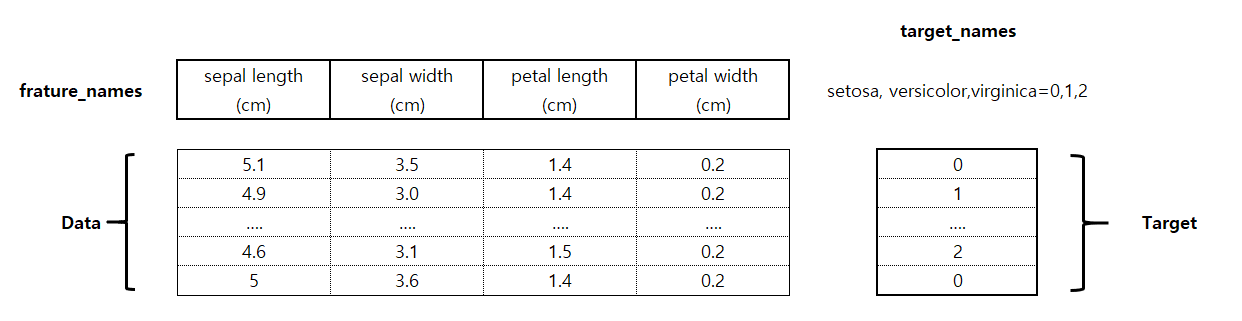

In [30]:
print('feature_names 의 type:',type(iris_data.feature_names))
print('feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

feature_names 의 type: <class 'list'>
feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [32]:
print('target_names 의 type:',type(iris_data.target_names))
print('feature_names 의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

target_names 의 type: <class 'numpy.ndarray'>
feature_names 의 shape: 3
['setosa' 'versicolor' 'virginica']


In [33]:
print('data 의 type:',type(iris_data.data))
print('data 의 shape:',iris_data.data.shape)
print(iris_data['data'])

data 의 type: <class 'numpy.ndarray'>
data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3

In [34]:
print('target 의 type:',type(iris_data.target))
print('target 의 shape:',iris_data.target.shape)
print(iris_data.target)

target 의 type: <class 'numpy.ndarray'>
target 의 shape: (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Model Selection 모듈 소개

### 학습/테스트 데이터셋의 분리 - train_test_split()

학습 데이터셋과 테스트 데이터셋을 분리하지 않을 시 -> 정확도가 100%가 나옴.<br>
둘을 분리해서 사용해야 함.

sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

* 첫번째 파라미터 : 피처 데이터 셋 입력, 두번째 파라미터 : 레이블 데이터 셋 입력
* 다음은 선택적 입력
    * `test_size` : 전체 데이터에서 test dataset 크기를 얼마로 샘플링할 것인지, default = 0.25 (25%)
    * ~~`train_size`: 전체 데이터에서 train dataset 크기를 얼마로 샘플링할 것인지~~
    * `random_state` : 난수 발생 seed값 지정, 지정하지 않을 시 호출할 때마다 다른 학습/테스트용 데이터 생성


* `train_test_split()`의 반환값은 튜플 형태.
    * train dataset의 feature dataset - test dataset의 feature dataset - train dataset의 label dataset - test dataset의 lable dataset이 순차적으로 반환.

In [38]:
# 7:3으로 분리

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

df_clf = DecisionTreeClassifier() #descisiontree분류기 객체생성
iris_data = load_iris() #iris dataset 로드

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,test_size = 0.3, random_state=121)

In [40]:
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
print('예측정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

예측정확도 : 0.9556


붓꽃 데이터는 데이터 양이 크지 않아(150개) 30%의 test dataset으로 알고리즘의 성능을 판단하기에 적절하지 X

### 교차검증

고정된 데이터셋으로 평가를 하다보면 과적합(Overfitting)이 일어날 수 있음. 
- 해당 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모들을 유도하는 경향
- 다른 테스트데이터나 실제 데이터에서는 성능이 저하되는 경향.

**_데이터 편중을 막기 위한_** 
<span style="color:red">&nbsp;<i>**Solution!**</i></span><br>

교차검증을 통해 여러 세트로 학습과 평가 수행,<br> 각 세트에서 수행한 평가 결과에 따라 모델 최적화를 더욱 쉽게 할 수 있음. 

학습, 검증, 테스트 데이터 셋으로 세분화
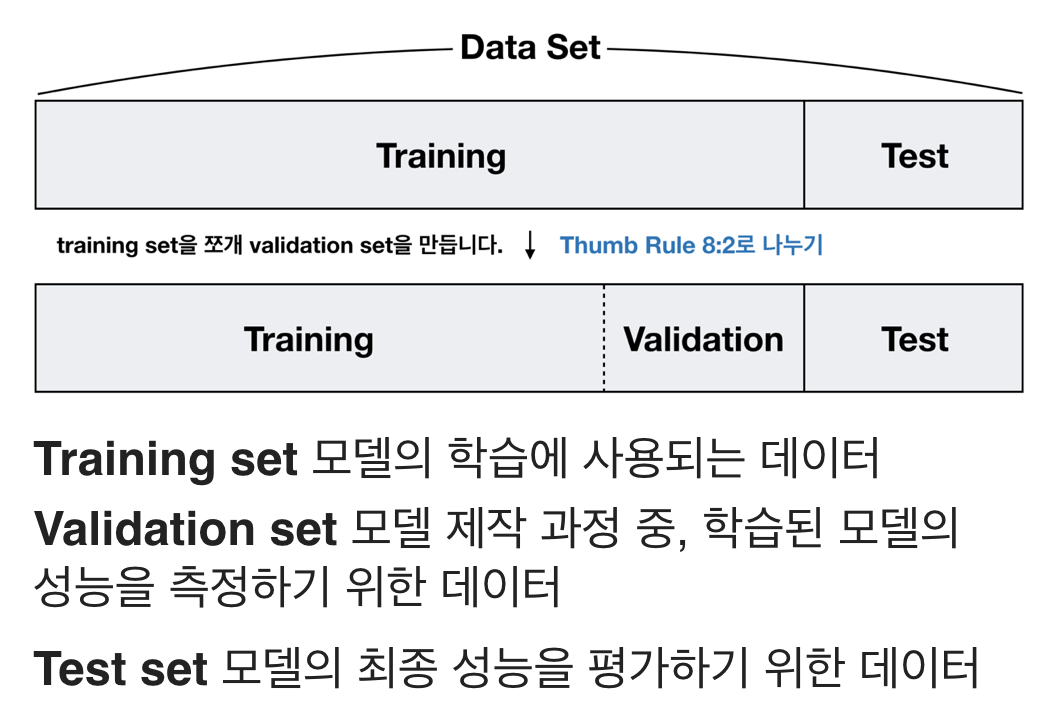

#### K 폴드 교차 검증

K개의 데이터 폴드 세트를 만들고, 각 폴드 세트에 대하여 학습과 검증 평가를 반복
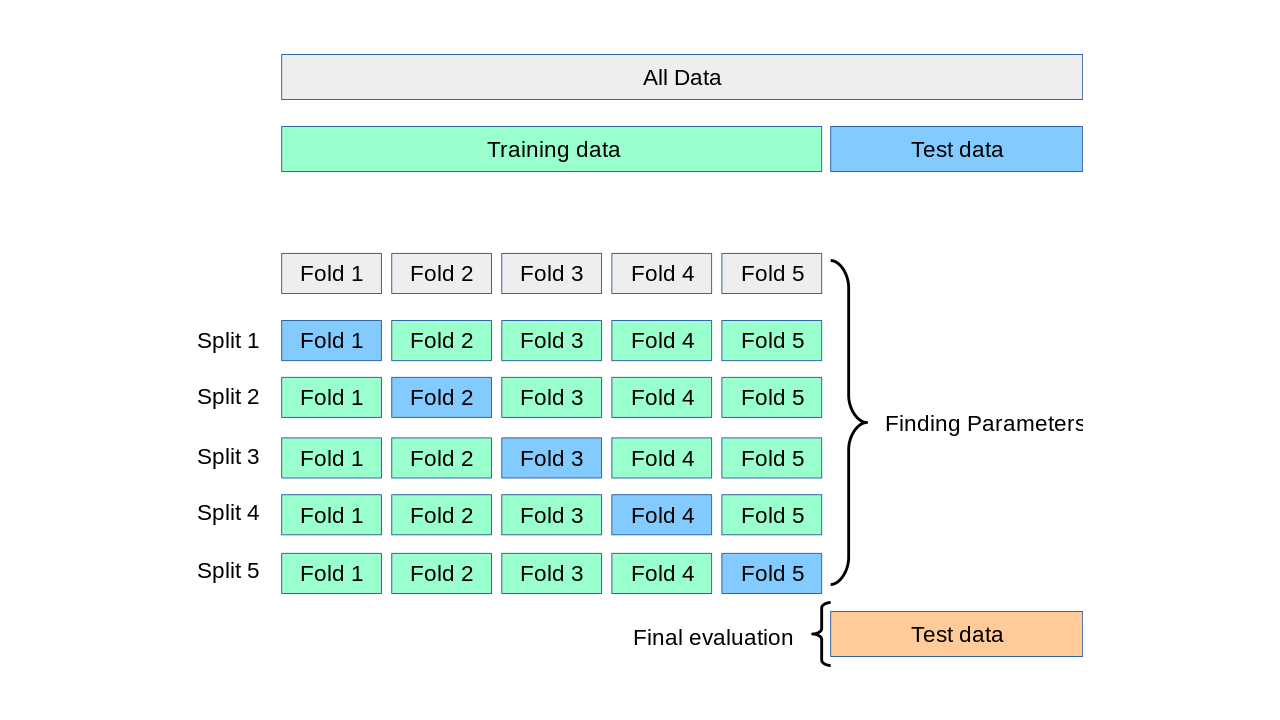

5개의 예측평가를 구했으면 이를 펴균해서 K폴드 평가 결과로 반영

In [42]:
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

kfold = KFold(n_splits=5) #5개의 폴드 세트로 분리하는 KFold객체
cv_accuracy = [] #폴드 세트별 정확도를 담을 리스트 객체 

print('붓꽃 데이터 세트 크기 :',features.shape[0])

붓꽃 데이터 세트 크기 : 150


`split()`을 호출하면 학습용/검증용 데이터로 분할할 수 있는 **인덱스** 반환
-> 여기서는 전체 붓꽃 데이터가 150개이므로, 학습용은 4/5인 120개, 테스트용은 1/5인 30개로 분할.  

> split(X, y=None, groups=None)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

|            |                                                                                                                                                                                                                                                                                                                                                                                                                         |
|------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Parameters | **X : array-like of shape (n_samples, n_features)** <br>Training data, where n_samples is the number of samples and n_features is the number of features. <br> **y : array-like of shape (n_samples,), default=None**<br>The target variable for supervised learning problems.<br>**groups : array-like of shape (n_samples,), default=None**<br>Group labels for the samples used while splitting the dataset into train/test set. |
| Yields     | **train : ndarray**<br>The training set indices for that split.<br>**test : ndarray**<br>The testing set indices for that split.                                                                                                                                                                                                                                                                                                |


In [47]:
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

> class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)
* n_splits의 default=5

In [46]:
kfold.split(features)

<generator object _BaseKFold.split at 0x000001655FB2E248>


<span style="color:blue">**파이썬 제너레이터(generator)란?**</span><br>

* 이터레이터(iterator)를 생성해주는 함수<br>
[이터레이터와 제너레이터](https://mingrammer.com/translation-iterators-vs-generators/)<br>
[파이썬 코딩도장 - 40.제너레이터 사용하기](https://dojang.io/mod/page/view.php?id=2412)


In [54]:
# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환 

n_iter =0
for train_index, test_index in kfold.split(features) :
    n_iter+=1
    print('\n{0}번째 iter'.format(n_iter),'\ntrain :',train_index,'\ntest :', test_index)


1번째 iter 
train : [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] 
test : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

2번째 iter 
train : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121

In [58]:
# 실제로 학습용/검증용 데이터를 추출하려면 반환된 인덱스를 기반으로 코딩해야함.
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    n_iter +=1
    
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train,X_test = features[train_index],features[test_index]
    y_train,y_test = label[train_index],label[test_index]
    
    #학습 및 예측
    dt_clf.fit(X_train,y_train)
    pred= dt_clf.predict(X_test)
    
    #반복 시마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred),4) #4자리에서 반올림
    train_size = X_train.shape[0]  
    test_size = y_train.shape[0]
    #->shape는 튜플로 (행,열 개수)를 반환하기 때문에 0이면 column vector 행의 개수를 알 수 있음.
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
              .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 120
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 120
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 120
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 120
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 120
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]


첫번째 검증에서 0-20번, 두번째 검증에서 21-40번, 세번째 검증에서 41-... <br>
이런식으로 각각 30개의 검증 세트 인덱스 생성 후 추출.

In [60]:
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('## 평균 검증 정확도:', np.mean(cv_accuracy))

## 평균 검증 정확도: 0.9


#### Stratified K 폴드

: 불균형한 분포도를 가진 레이블(label,결정 클래스) 데이터 집합을 위한 K폴드 방식.
-> 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말함.

Ex) 대부분이 정상 대출이고 0.0001%정도만 대출사기일 때. <br>
-> 원본 데이터와 유사한 대출 사기 레이블 값의 분포를 학습/테스트 세트에도 유지하는 것이 중요. 

<span style="color:red"><i>**Solution!**</i></span><br>
Stratified KFold를 사용하면 원본 데이터의 레이블 분포를 고려한 뒤, 이 분포와 동일하게 학습과 검증 데이터 셋을 분배해줌.


In [61]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [66]:
#3개의 k-fold 생성
kfold = KFold(n_splits=3)
n_iter =0

for train_index, test_index in kfold.split(iris_df) :
    n_iter +=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('\n##교차검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    


##교차검증: 1
학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64

##교차검증: 2
학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64

##교차검증: 3
학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


폴드를 3개로 만드는 경우, 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출됨.
-> 이 경우 검증 데이터셋에 있는 레이블을 전혀 학습하지 못하므로는 검증 예측 정확도가 0이 됨.

Stratified KFold를 사용하는 방법은 KFold를 사용하는 방식과 유사한데, <br>
`split( )` 매서드에 인자로 피처 데이터 세트 뿐만 아니라 레이블 데이터셋도 필요하단 점이 차이가 있음.


In [71]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter =0

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요
for train_index, test_index in skf.split(iris_df,iris_df['label']) :
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    
    print('\n## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())



## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64

## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64

## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64


학습 레이블과 검증 레이블 데이터 값의 분포도가 1:1:1로 동일하게 할당.

In [77]:
#StratifiedKFold를 이용한 붓꽃 데이터 교차검증

# iris = load_iris()
# features = iris.data -> ndarray type
# label = iris.target -> ndarray type
# dataFrame으로 받아왔을 때와 코드 차이가 있음. 

dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

for train_index, test_index in skfold.split(features,label) :
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    
    #반복시마다 정확도 측정
    n_iter +=1
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


정확도 약 96.6%

<span style="color:blue">**`np.round()` 함수 참고할 점**</span><br>

> 프로그래밍 언어에서 가장 많이 쓰이는 방식은 round to nearest even으로, 가장 가까운 “짝수”로 반올림한다. 즉, 반올림되는 수 바로 앞의 값이 짝수인 경우 버림이 되고, 반올리 되는 자릿수의 값이 홀수인 경우 올림이 된다.

> For values exactly halfway between rounded decimal values, Numpy rounds to the nearest even value. Thus 1.5 and 2.5 round to 2.0, -0.5 and 0.5 round to 0.0, etc. Results may also be surprising due to the inexact representation of decimal fractions in the IEEE floating point standard [R9] and errors introduced when scaling by powers of ten.

이렇게 함으로써 확률적으로 실제 평균값에 가깝도록 만드는 것이다. 이러한 방식을 Banker's Rounding 방식이라고 한다.

실제로 .5를 일반적인 반올림하고 싶다면, 1e-9같이 정답에 영향을 미치지 않는 아주 작은 수를 더한 다음 반올림하거나 직접 정수 나눗셈으로 반올림을 구현해야 한다.


일반적으로 분류에서 교차검증은 K폴드 대신 stratified K폴드로 분할해야.


#### 교차검증을 간편하게 - cross_val_score()

KFold로 데이터를 학습하고 예측하는 절차
1. 폴드 세트를 설정하고
2. for루프에서 반복적으로 학습 멫 테스트 데이터의 인덱스를 추출
3. 반복적으로 학습과 예측을 수행해서 예측성능을 반환

-> cross_val_score()는 이러한 과정을 한번에 수행해주는 API!
* 분류일 경우 Stratified KFold 방식으로, 회귀일 경우에는 KFold 방식으로 분할 (회귀의 경우에는 레이블이 연속된 숫자이기 때문에)

> sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)

* `estimator` : 사이킷런의 분류 알고리즘인 Classifier / Regressor 의미
* `X` : 피처 데이터 셋, `y` : 레이블 데이터 셋
* `scoring` : 예측 성능 평가 지표
* `cv` : 교차 검증 폴드 수

* 리턴값 : `scoring` 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score #,cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf,data,label,scoring='accuracy',cv=3)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


위의 StratifiedKFold를 사용한 결과와 동일.<br> 
`cross_val_score()`은 API 내부에서 학습(fit)-예측(predict)-평가(evaluation)를 수행하므로 간단하게 교차검증을 수행할 수 있음.

* 비슷한 API로 `cross_validate`가 있음. -> 여러 개의 평가지표를 반환할 수 있음.

#### GridScarchCV - 교차검증과 최적 하이퍼 파라미터 튜닝을 한 번에

GridSearch API를 이용해 Estimator의 하이퍼 파라미터를 순서대로 입력하면서 최적의 파라미터를 도출할 수 있는 방안을 제공. for루프로 모든 파라미터를 번갈아 입력하면서 학습시키는 방법을 좀 더 유연하게 API레벨에서 제공한 것.<br>
(`Grid` - 격자라는 뜻으로 촘촘하게 파라미터를 입력하면서 테스트하는 방식) 

* `GridSearchCV`는 교차 검증을 기반으로 하이퍼 파라미터 최적값을 찾는 방식.
Ex) CV=3이라면 개별 파라미터 조합마다 3회씩 폴딩 세트를 학습/평가하여 평균값으로 성능 측정.

> class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

- `estimator` : classifier, regressor, pipline이 사용될 수 있음.
- `param_grid` : {key+리스트} 값을 가지는 딕셔너리가 주어짐. estimator 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정.
- `scoring` : 예측 성능을 측정할 평가 방법 지정. 보통 사이킷런의 성능 평가 지표를 지정하는 문자열(정확도의 경우 : 'accuracy')로 지정.
- `cv` : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정.
- `refit` : default = true 이며, true로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤, 입력된 estimator 객체를 해당 파라미터로 재학습시킴 -> `best_estimator_` 속성에 저장.

In [87]:
# GridScearchCV를 사용하여 붓꽃데이터를 예측 분석

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()


In [88]:
### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

하이퍼 파라미터의 명칭은 문자열 key값으로, 하이퍼 파라미터 값은 리스트 형으로 설정

* Decision Tree Classifier의 파라미터

|    파라미터 명    | 설명                                                                                                                                                                                                                                                           |
|:-----------------:|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| min_samples_split | - 노드를 분할하기 위한 최소한의 샘플 데이터수 → 과적합을 제어하는데 사용 <br>- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가                                                                                                                |
|  min_samples_leaf | - 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수 <br>- min_samples_split과 함께 과적합 제어 용도 <br>- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요                                                                          |
|    max_features   | - 최적의 분할을 위해 고려할 최대 feature 개수 <br>- Default = None → 데이터 세트의 모든 피처를 사용 <br>- int형으로 지정 →피처 갯수 / float형으로 지정 →비중 <br>- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정 <br>- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정 |
|     max_depth     | - 트리의 최대 깊이 <br>- default = None → 완벽하게 클래스 값이 결정될 때 까지 분할 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할 <br>- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요                                                             |
|   max_leaf_nodes  | 리프노드의 최대 개수                                                                                                                                                                                                                                           |

In [92]:
import pandas as pd

# GridSearchCV 객체 생성
# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가.
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

GridSearchCV의 fit() 매서드를 수행하면 cv의 폴딩셋 개수대로 분할해 학습/평가를 수행하고, 그 **_결과_**를 `cv_results_` 속성에 기록한다. 

* `cv_resluts_` : gridsearchcv의 결과 세트 | 딕셔너리 형태로 key값과 lsit의 value값 가짐.

In [93]:
# GridSearchCV 결과 추출하여 DataFrame으로 변환.
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


총 6개의 결과 -> max_depth 3개 * min_samples_split 2개 를 순차적으로 변경하며 학습/평가 수행

* 결과 해석
    * 4번과 5번의 파라미터를 사용한 경우가 가장 높은 mean_test_score을 기록, rank_test_score에서 예측 성능 1위


* 주요 칼럼별 의미 정리
    * params 칼럼에는 개별 하이퍼 파리미터 값 기록
    * rank_test_score는 하이퍼 파라미터별로 성능이 좋은 score 순위 (1이 가장 뛰어난 순위, 이 때의 파라미터가 최적의 파이퍼 파라미터임)
    * splitN_test_score 는 각 폴딩 세트에서 테스트한 성능 수치
    * mean_test_score는 각 폴딩의 test_score값을 평균한 것
   

GridSearchCV 객체의 fit()을 수행하면, 최고 성능을 나타낸 하이퍼 파라미터 값과 그때의 평가 결과 값이 각각 `best_params_`, `best_score_` 속성에 기록된다. 

In [94]:
print('GridSearchCV 최적 파라미터 :', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :0.9750


In [96]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
# 최적의 하이퍼 파라메터로 estimator 재학습시키고, 이를 best_estimator_에 저장해놓음.
estimator = grid_dtree.best_estimator_ 

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


일반적으로 학습 데이터를 GridSearchCV를 이용하여 최적 하이퍼 파라미터 튜닝을 수행한 뒤 -> 별도의 test dataset에서 평가하는 것이 일반적인 머신러닝 모델 적용 방법임.

## 데이터 전처리

"Garbage In, Garbage Out."

사이킷런 ML 알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야 할 기본 사항
* NaN(결손값,Null값)은 허용되지 않음.
* 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 혀용하지 않음. 
-----

* 일반적으로 `fit()`은 데이터 변환을 위한 기준 정보 설정
* `transform()`은 이렇게 설정된 정보를 이용해 데이터를 변환.
* `fit_transform()`은 fit과 transform을 순차적으로 적용하는 기능을 수행.

### 데이터 인코딩

1. 레이블 인코딩(Label encoding)
2. 원-핫 인코딩(One-Hot encoding)


#### 레이블 인코딩

: 문자열 값을 숫자형 카테고리 값으로 변환

사이킷런의 `LableEncoder` 클래스로 구현 가능.
* LabelEncoder 를 객체로 생성한 후, `fit()`과 `transform()`을 호출해 레이블 인코딩을 수행.

In [97]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값 :',labels)

인코딩 변환값 : [0 1 4 5 3 3 2 2]


In [98]:
print('인코딩 클래스: ',encoder.classes_)

인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


`classes_` 속성은 0번부터 순서대로 변환된 인코딩 값에 대한 원본값을 가지고 있음.
TV->0, 냉장고->1 ... 로 인코딩 되었음을 알 수 있음.


inverse_Transform()을 통해 인코딩 된 값을 다시 디코딩 할 수 있음. 

In [100]:
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


But 몇몇 ML 알고리즘에서는 레이블의 숫자가 클수록 가중치가 더 부여되면서 예측 성능이 떨어질 수 있음. -> 트리 계열에서는 별 문제가 없지만, 선형 회귀와 같은 ML 알고리즘에서는 적용하지 X


이러한 문제점을 해결하기 위해 **_원-핫 인코딩(One-Hot Encoding)_** 사용.

#### 원-핫 인코딩(One-Hot Encoding)
: 피처 값의 유형에 따라 새로운 피처를 추가해, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시

사이킷런의 `OneHotEncoder` 클래스로 변환 가능

1. 모든 문자열 값이 숫자형으로 변환돼야
2. 입력값으로 2차원 데이터가 필요


In [102]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 1. 숫자값으로 변환을 위해 LabelEncoder로 변환합니다. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)


In [103]:
# 2. 2차원 데이터로 변환합니다. 
labels = labels.reshape(-1,1)
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]], dtype=int64)

In [104]:
#3. 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


* `get_dummies` 를 이용하면 숫자형 변환 필요 없음.

In [105]:
import pandas as pd 

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']})
df

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [107]:
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 피처 스케일링과 정규화
: 서로 다른 값의 범위를 일정한 수준으로 맞추는 작업

1. 표준화(Standardization) : 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것<br>
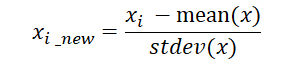

2. 정규화(Normalization) : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념.<br>(모두 최소 0 ~ 최대 1 의 값으로 변환하는 것)
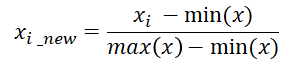

    * 벡터 정규화 : 사이킷런의 정규화 모듈은 선형대수에서의 정규화 개념이 적용되어, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미.<BR>
     = 개별 벡터 / 모든 피처 벡터의 크기
    
    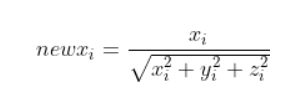

<span style="color:red">**[질문]**</span><br>
1)표준화/정규화의 확률-통계적 의미와 2)왜 사용해야 하는지?

#### StandardScaler
: 표준화를 지원하기 위한 클래스 -> 가우시안 정규 분포를 가질 수 있도록 데이터를 변환

RBF 커널을 이용하는 SVM이나 선형회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 될 수 있음. 


In [108]:
from sklearn.datasets import load_iris
import pandas as pd

#붓꽃 데이터셋을 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [112]:
from sklearn.preprocessing import StandardScaler
#StandardScaler를 이용해 각 피처를 한 번에 표준화

# 1. StandardScaler 객체 생성
scaler = StandardScaler()
# 2. StandardScaler로 데이터 셋 변환. - fit()과 Transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# 3. transform()의 return형이 ndarray이므로 이를 DataFrame으로 변환.
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 칼럼 값의 평균이 0에 가까운 값으로, 분산은 1에 가까운 값으로 변환됨.

#### MinMaxScaler
: 데이터값을 0과 1 사이의 범위 값으로 변환 (음수가 있으면 -1 -> 1값으로 변환)


In [114]:
from sklearn.preprocessing import MinMaxScaler

# 1. MinMaxScaler객체 생성
scaler = MinMaxScaler()
# 2. MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df) #fit()을 통해 최대, 최소값 파악
iris_scaled = scaler.transform(iris_df) #fit()의 정보 바탕으로 transform()에서 학습데이터 변환

# 3. transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max()) 

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


모든 피처가 0~1사이 값으로 변환됨.

### 학습 데이터와 테스트 데이터 스케일링 변환 시 유의점
: 학습 데이터에 fit-transform을 적용했으면, 테스트 데이터 셋에서는 fit()을 수행하지 말고 학습데이터 셋의 fit 결과를 이용하여 transform 변환을 적용해야. -> test dataset에서 새로운 스케일링 기준 정보 만들지 말기! (서로 기준 정보가 달라져 오차 커질 수 있음)

1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리.
2. 1이 불가능하다면 테스트 데이터 변환 시에는 fit(  )이나 fit_transform(  )을 적용하지 않고 학습데이터로 이미 fit(  )된 Scaler 객체를 이용하여 transform(  ) 수행.


+)  Scaler 클래스의 `fit( )` 과 `transform( )`은 **2차원 이상 데이터만 가능**함.
* reshape(-1,1)로 차원 변경 필요

In [118]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0~10, 테스트 데이터는 0~ 5 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [124]:
# 최소값 0, 최대값 1로 변환하는 MinMaxScaler객체 생성
scaler = MinMaxScaler()
# fit()하게 되면 train_array 데이터의 최소값이 0, 최대값이 10으로 설정.  
scaler.fit(train_array)
# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)
 
print('원본 train_array 데이터:', train_array.reshape(-1))
print('Scale된 train_array 데이터:', train_scaled.reshape(-1))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [127]:
# 앞에서 생성한 MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최소값이 0, 최대값이 5으로 설정됨 
scaler.fit(test_array)
# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.  
test_scaled = scaler.transform(test_array)
# train_array 변환 출력
print('원본 test_array 데이터:', test_array.reshape(-1))
print('Scale된 test_array 데이터:', test_scaled.reshape(-1))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


학습 데이터와 테스트 데이터를 각각 fit()할 경우, 서로 다른 원본값이 동일한 변환 값으로 나타나게 됨. -> fit( )은 test dataset에서 한 번만!

In [128]:
scaler=MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


마찬가지 이유로 학습 데이터에서는 `fit_transform()`을 사용해도 되지만, 테스트 데이터셋에서는 사용하면 안됨.

## 사이킷런으로 수행하는 타이타닉 생존자 예측


In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('..\\titanic\\data\\train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [135]:
# 데이터 칼럼 타입 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [137]:
# fillna()로 Null값 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace = True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터셋 Null값 개수 :',titanic_df.isnull().sum().sum())

데이터셋 Null값 개수 : 0


In [138]:
# 문자열 피처 값 분포 확인하기
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
D                3
              ... 
C104             1
D46              1
D47              1
C70              1
C91              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Cabin 값의 경우, Null 값이 너무 많으며 한번에 여러개의 선실 값이 표기된 피처값도 있음. -> Cabin의 경우 앞 문자(선실 등급)만 추출!

In [142]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

In [146]:
titanic_df.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [149]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

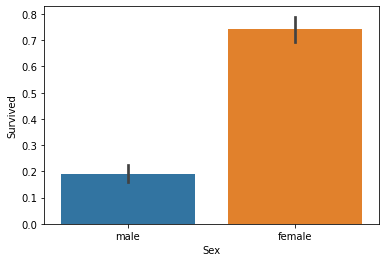

In [155]:
# 성별에 따른 생존 확률
sns.barplot(x='Sex',y='Survived',data=titanic_df)

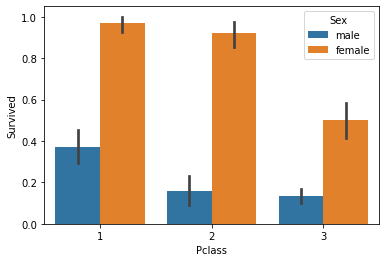

In [156]:
# 객실 등급에 따른 생존 확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

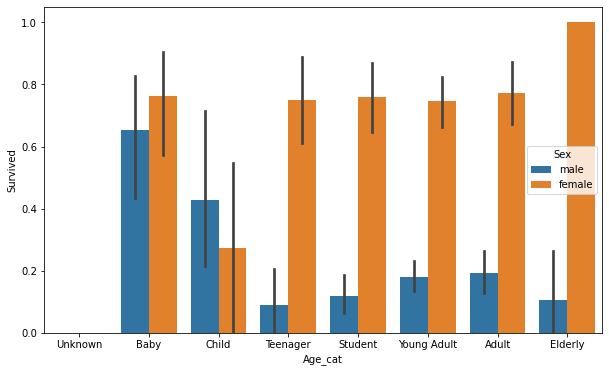

In [157]:
#Age에 따른 생존 확률

# 1.입력 age에 따라 구분값을 반환하는 함수 설정.
def get_category(age) :
    cat=''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# 2.get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [164]:
# 문장형 카테고리 피처를 숫자형 카테고리 피처로 변환
from sklearn import preprocessing

def encode_features(dataDF) :
    features = ['Cabin','Sex','Embarked']
    for feature in features :
        le = preprocessing.LabelEncoder()
        le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF
    
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


카테고리 값의 유형 수에 따라 0 ~ (카테고리 유형수 -1)까지의 숫자 값으로 변환

In [168]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df


In [169]:
# 머신러닝 알고리즘에 불필요한 속성 제거 -> 식별을 위해 사용되는 사람마다 교유한 값들
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df


In [170]:
# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


In [171]:
# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [174]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 

titanic_df = pd.read_csv('..\\titanic\\data\\train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1) #Survived열을 제외한 나머지 feature값을 사용

# 1. 결측치 처리 - 2. 불필요한 속성 제거 - 3. 레이블 인코딩 수행
X_titanic_df = transform_features(X_titanic_df)

In [177]:
# 4. 학습-테스트 데이터 분리 : 8:2
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,test_size = 0.2, random_state=11)

In [178]:
# 결정 트리, 랜덤 포레스트, 로지스틱 회귀(이름은 회귀지만 강력한 분류 알고리즘) 
# 5. ML 알고리즘 이용해서 생존자 예측

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492


C:\Users\Yujin\anaconda3\envs\dsvenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<span style="color:red">**[질문]**</span><br>
p.142 -> 교재 [output]과 다른 값이 나옴.

In [181]:
#6. 교차 검증 수행하여 모델 평가
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
     # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        # end of for loop.
        
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

# exec_kfold 호출
exec_kfold(dt_clf , folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [179]:
kfold.split(X_titanic_df)

<generator object _BaseKFold.split at 0x00000165612900C8>

In [180]:
enumerate(kfold.split(X_titanic_df)) #enumerator로 iter_count까지 같이 넘겨줌.

In [182]:
from sklearn.model_selection import cross_val_score

#Stratified KFold 수행 후 scoring 파라미터 결과값 배열 반환
scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5) 
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [183]:
# 7. GridSearchCV로 최적 하이퍼 파라미터 찾고 예측 성능 측정
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
